# Supervised Learning - Foundations: ReCell 


## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#importing data from csv file
data=pd.read_csv('used_device_data.csv')

In [3]:
#making a copy of the original dataframe so as to retain the original
df=data.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
#Checking the shape of dataframe
df.shape

(3454, 15)

There are 3454 observations and 15 data attributes in the dataframe.

In [5]:
#Verifying sample rows from the input, using random seed so as to get the same sample every time
np.random.seed(1)
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.240,no,no,8.000,2.000,16.000,4.000,3000.000,206.000,2014,632,179.610,56.760
957,Celkon,Android,10.160,no,no,3.150,0.300,512.000,0.250,1400.000,140.000,2013,637,48.650,16.450
280,Infinix,Android,15.390,yes,no,NaN,8.000,32.000,2.000,5000.000,185.000,2020,329,88.880,79.100
2150,Oppo,Android,12.830,yes,no,13.000,16.000,64.000,4.000,3200.000,148.000,2017,648,281.300,107.540
93,LG,Android,15.290,yes,no,13.000,5.000,32.000,3.000,3500.000,179.000,2019,216,200.420,91.620
1040,Gionee,Android,12.830,yes,no,13.000,8.000,32.000,4.000,3150.000,166.000,2016,970,279.870,104.130
3170,ZTE,Others,10.160,no,no,3.150,5.000,16.000,4.000,1400.000,125.000,2014,1007,69.710,43.140
2742,Sony,Android,12.700,yes,no,20.700,2.000,16.000,4.000,3000.000,170.000,2013,1060,330.240,83.330
102,Meizu,Android,15.290,yes,no,NaN,20.000,128.000,6.000,3600.000,165.000,2019,332,420.170,142.510
1195,HTC,Android,10.290,no,no,8.000,2.000,32.000,4.000,2000.000,146.000,2015,892,131.500,68.570


From the sample 10 rows, it is visible that there are some missing values in main_camera_mp; but there could be in other columns too. Will need to further check for missing values with logic.

In [6]:
#Checking the information of all the attributes from the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


From the info, it is evident that brand_name, os, 4g and 5g are of string type, release_year and days_used is of integer type and rest all attributes are of float type. 
6 out of 15 columns in the dataframe are having missing values, need to investigate in deep on each of the attributes, to treat these missing values.

In [7]:
df['4g'].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

In [8]:
df['5g'].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

4g and 5g attributes have data of yes or no; so these could be converted to categorical data type which can reduce memory.

In [9]:
#Converting these string attributes to categorical data type
df['4g'] = df['4g'].astype('category')
df['5g'] = df['5g'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   object  
 1   os                3454 non-null   object  
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
dtypes: category(2), float64(9), int64(2), object(2)
memory usage: 357.9+ KB


Both the attributes are category now and the memory reduced from 404.9KB to 357.9KB

In [11]:
#Checking if there are duplicate values in the dataset at row level
df.duplicated().sum()

0

The 0 signifies there are no row level duplicates in the dataframe.

In [12]:
#Checking if there are missing values in the dataframe
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

There are 179 missing values in main_camera_mp and <10 missing values in each of selfie_camera_mp, int_memory, ram, battery and weight in the dataset.

In [13]:
#checking the statistical summary of the numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.000,13.713,3.805,5.080,12.700,12.830,15.340,30.710
main_camera_mp,3275.000,9.460,4.815,0.080,5.000,8.000,13.000,48.000
selfie_camera_mp,3452.000,6.554,6.970,0.000,2.000,5.000,8.000,32.000
int_memory,3450.000,54.573,84.972,0.010,16.000,32.000,64.000,1024.000
ram,3450.000,4.036,1.365,0.020,4.000,4.000,4.000,12.000
battery,3448.000,3133.403,1299.683,500.000,2100.000,3000.000,4000.000,9720.000
weight,3447.000,182.752,88.413,69.000,142.000,160.000,185.000,855.000
release_year,3454.000,2015.965,2.298,2013.000,2014.000,2015.500,2018.000,2020.000
days_used,3454.000,674.870,248.580,91.000,533.500,690.500,868.750,1094.000
new_price,3454.000,237.039,194.303,18.200,120.343,189.785,291.115,2560.200


From the summary, we could see various information like the size of the phones from the input varied between 5 till 30cm; similarly main camera ranged from 0.08 till 48 mega pixel. The least weighing phone is 69 grams whereas the heaviest one is 855grams. We could also see the quartile values for all the numeric features.

In [14]:
#Similarly, checking summary of non-numerical attributes
df.describe(exclude='number').T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


This summary shows a simple view of the object and categorical data. There seems we have data for 34 different brands of devices, 4 different OS of which Android is the highest frequency. We observed earlier too, 4g and 5g have yes or no values.

In [15]:
#Value counts on OS:
df['os'].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

As observed earlier, Android is the top most OS in our data, with Windows and iOS following. There is a value Others too.

In [16]:
#Value counts on brand_name:
df['brand_name'].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Vivo          117
Micromax      117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

This shows there are 502 devices with Others as brand_name; being the highest number. Later followed by Samsung with 341 devices.

## Exploratory Data Analysis (EDA)

## Univariate Analysis

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
#brand_name value counts in descending order; shows the list of brands with high to low number of phones
df['brand_name'].value_counts().sort_values(ascending=False)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Vivo          117
Micromax      117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

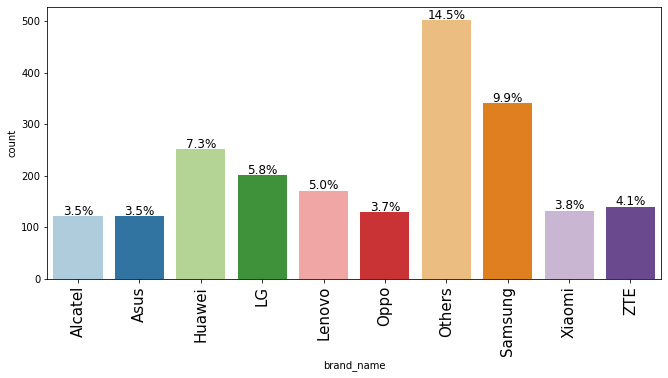

In [19]:
#plot on some sample 10 brand_name attribute
labeled_barplot(df,"brand_name",perc=True,n=10)
plt.show()

<AxesSubplot:>

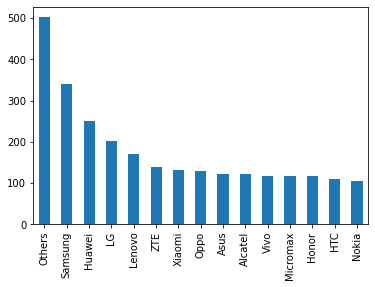

In [20]:
#Plot shows the top 15 brands where the value counts are the highest
df['brand_name'].value_counts()[:15].plot(kind='bar') 

As observed in value_counts earlier, devices with brand_name Others are the top most in count, later Samsung, Huawei and others followed.

### What percentage of the used device market is dominated by Android devices?

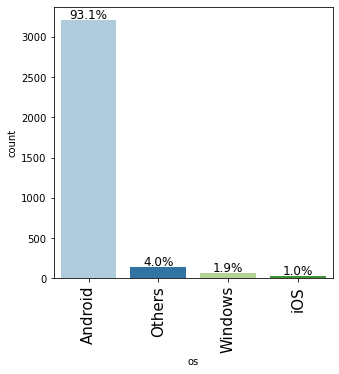

In [21]:
#plot on OS attribute
labeled_barplot(df,"os",perc=True)

This plot shows Android is the top most ocurring OS in the dataset with 93.1% and iOS the least ocurring with 1% of the devices. SO its evident that Android devices are the highest share in the used device market.

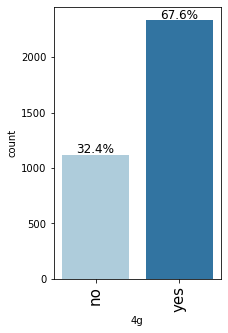

In [22]:
#plot on 4G attribute
labeled_barplot(df,"4g",perc=True)

This plot shows that 67.6% of the devices from our dataset support 4G and 32.4% dont support.

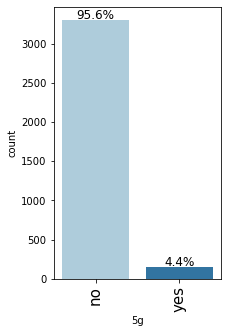

In [23]:
#plot on 5G attribute
labeled_barplot(df,"5g",perc=True)

This plot shows that only 4.4% of the devices in our dataset support 5G network, rest 95.6% dont. This makes sense because 5G being the latest, only most recent manufactured devices could be supporting the 5G network.

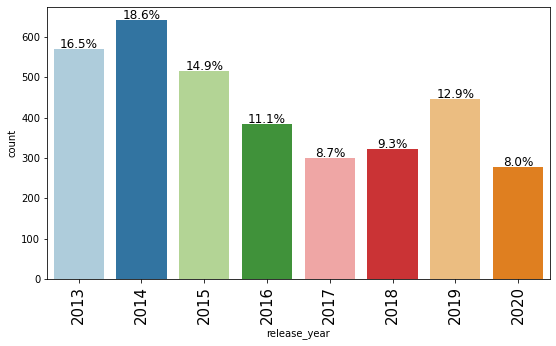

In [24]:
#plot on release_year attribute
labeled_barplot(df,"release_year",perc=True)

This plot shows the % of devices from each of the manufactured years spanning from 2013 till 2020; we do have a good variety of data for all these 8 years for our statistical analysis. THe highest count of devices from 2014, at 18.6% of our data and lowest being 2020 which is 8%.

In [25]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### What does the distribution of used device prices look like?

In [26]:
#Univariate analysis on used_price
df['used_price'].value_counts().shape

(3094,)

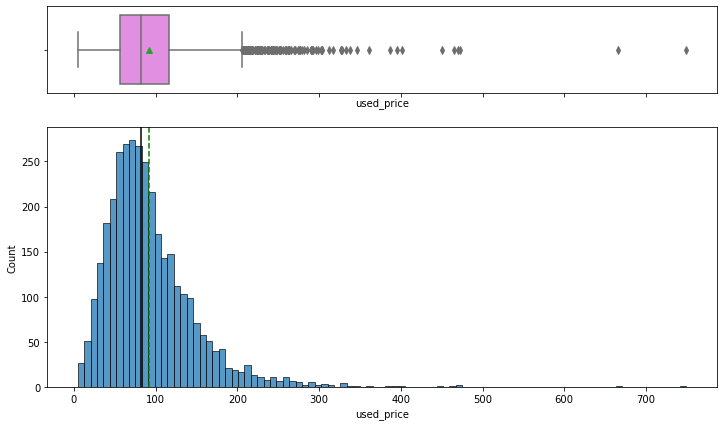

In [27]:
#Plotting used_price using a histogram and box plot combination
histogram_boxplot(df, 'used_price')

The plot shows that the used devices price is ranging from as low as 5 euros till as high as 750 euros in the market.
However the box plot above shows there are many outliers, so there is skewness in the data.

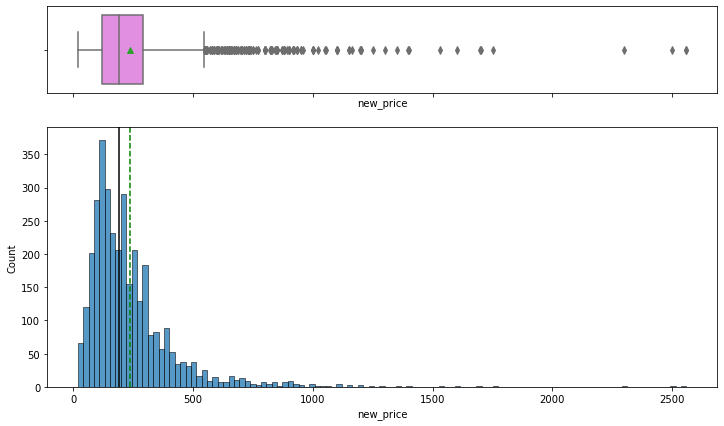

In [28]:
#Plotting new_price using a histogram and box plot combination
histogram_boxplot(df, 'new_price')

This plot also shows skewness in data, there are lot of outliers as seen in the box plot.
The new_price ranged from as low as 18euros to as high as 2500euros in our dataset.

In [29]:
#Finding what the mean percentage of decrease in the used_price of these devices compared to the new_price
percent_change=np.mean(((df['new_price'] - df['used_price'])/df['new_price'])* 100)

print('The average percentage decrease in price of these used devices compared to new price:',round(percent_change,2))

The average percentage decrease in price of these used devices compared to new price: 55.12


In [30]:
#screen_size is provided in cm, converting to inches to make more easy to analyze and understand
df['screen_size'] = df['screen_size'] / 2.54

<AxesSubplot:xlabel='screen_size'>

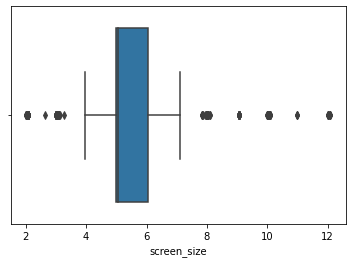

In [31]:
sns.boxplot(df['screen_size'])

Majority of the devices have screen size of 5 to 6 inches; there are however some with 2inch screen size and maximum upto 12inch screen size. Our dataset contains mobiles and tablets; so a screen size of 12 inch is very much possible and valid. 

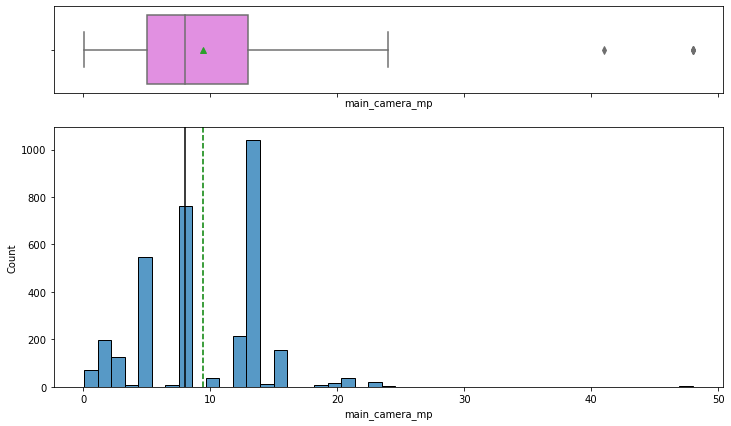

In [32]:
#Plotting main_camera_mp using a histogram and box plot combination
histogram_boxplot(df,'main_camera_mp')

The plot shows majority of the devices have around 13 mega pixel for the main camera. It alo shows there are some devices with values spanning as high as 48 megapixel and as low as 1-2 mega pixel.

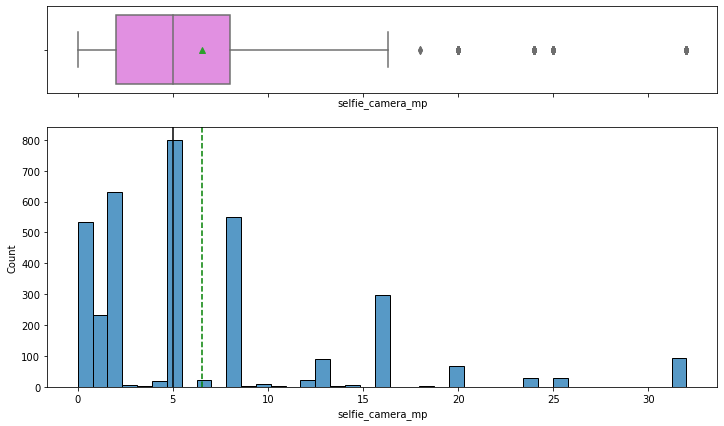

In [33]:
#Plotting selfie_camera_mp using a histogram and box plot combination
histogram_boxplot(df,'selfie_camera_mp')

The plot shows more number of the devices have around 5 mega pixel for the selfie camera. It alo shows there are some values spanning as high as 32 megapixel and as low as 0 mega pixel.

In [34]:
#Checking the value counts of int_memory
df['int_memory'].value_counts()#.sort_values(ascending=False)

16.000      1283
32.000      1083
64.000       509
128.000      372
256.000       86
512.000       44
0.060         18
0.100         17
8.000         12
4.000         10
1024.000       8
0.500          4
0.200          2
24.000         1
0.010          1
Name: int_memory, dtype: int64

A devices' internal memory, ofcourse, has these values like 16, 32, 256, 512 GB and so on..

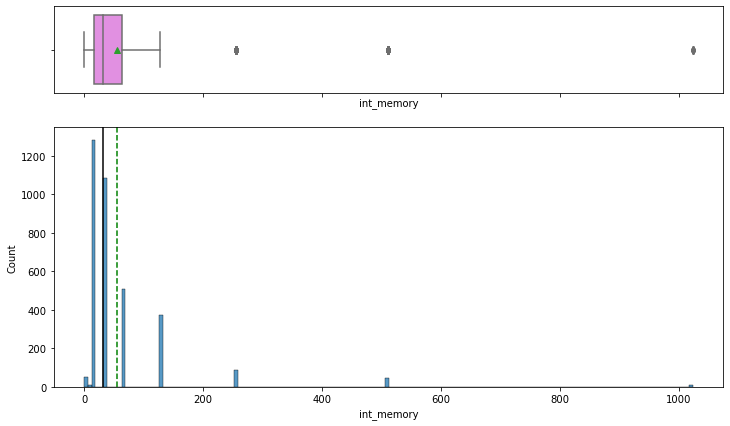

In [35]:
#Plotting int_memory using a histogram and box plot combination
histogram_boxplot(df,'int_memory')

The plot shows the data is highly right skewed, for int_memory attribute.

In [36]:
#Checking value counts on ram
df['ram'].value_counts()

4.000     2815
6.000      154
8.000      130
2.000       90
0.250       83
3.000       81
1.000       34
12.000      18
0.020       18
0.030       17
0.500        9
1.500        1
Name: ram, dtype: int64

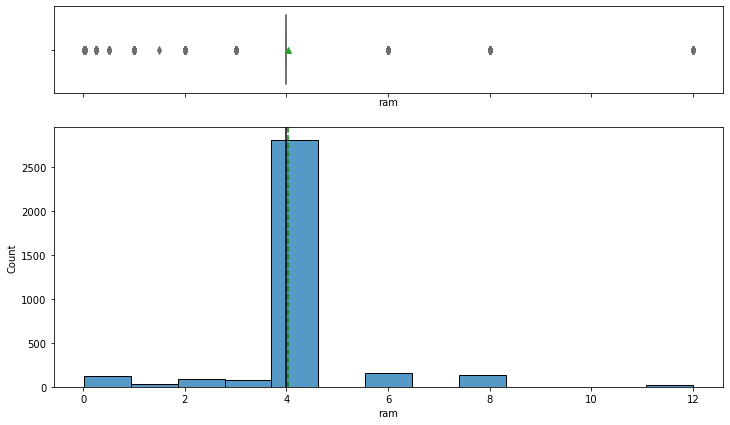

In [37]:
#Plotting RAM using a histogram and box plot combination
histogram_boxplot(df,'ram')

The plot shows majority of the devices have 4GB as RAM, there are however values ranging from 0 to 12 GB of RAM in the dataset.

In [38]:
#Checking value counts on battery
df['battery'].value_counts()

4000.000    341
3000.000    314
2000.000    244
2500.000    137
2100.000    121
           ... 
3110.000      1
2480.000      1
3330.000      1
8134.000      1
7400.000      1
Name: battery, Length: 324, dtype: int64

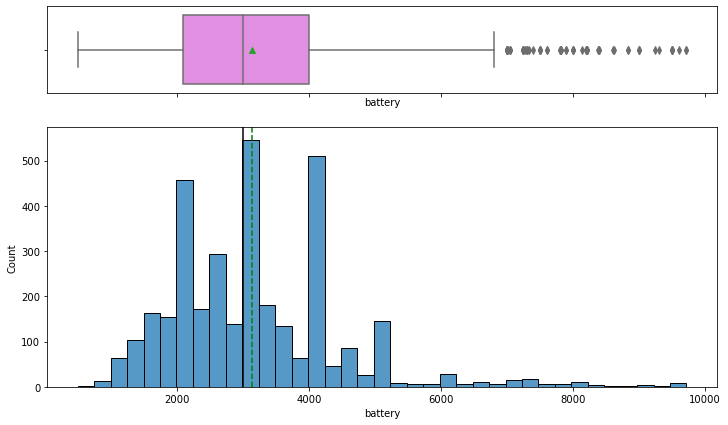

In [39]:
#Plotting battery using a histogram and box plot combination
histogram_boxplot(df,'battery')

The plot shows that Mean and Median values are close to each other and at around 3000 mAh which is also the highest amoung the devices. The data is skewed towards right as there are many outliers spanning till 9720 mAh.

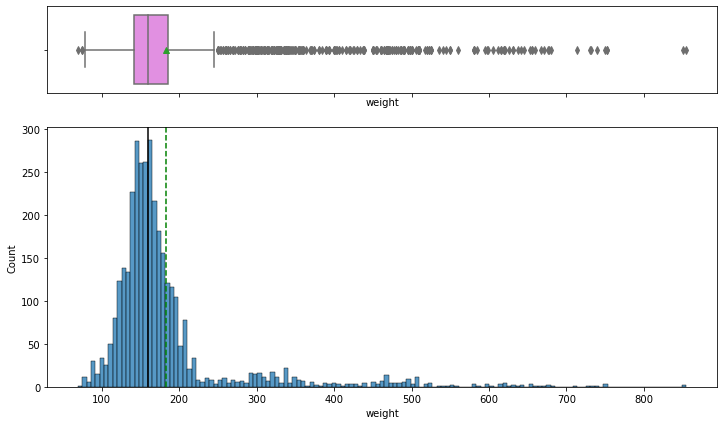

In [40]:
#Plotting weight using a histogram and box plot combination
histogram_boxplot(df,'weight')

The plot shows maximum devices weight is around 100-200 grams but there are lot of outliers towards right spanning till a maximum of 850grams.

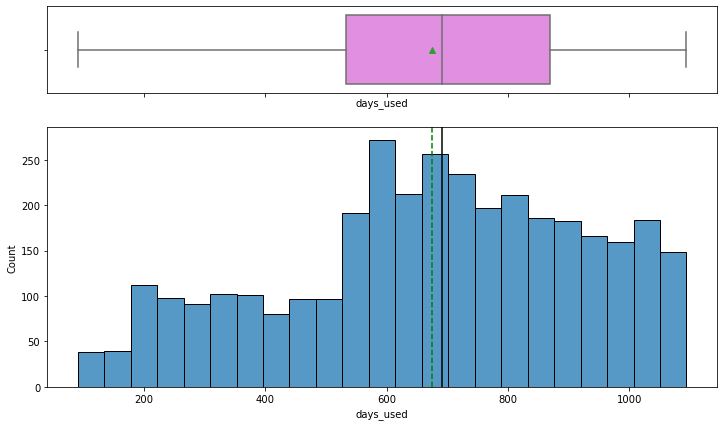

In [41]:
#Histogram box plot to check days used attribute
histogram_boxplot(df,'days_used')

This plot shows the number of days these devices are used; this ranges from as low as 100 till around 1000 plus days.
As per general assumption, the more the number of days a device is used, the price will reduce. This could be verified against our data for confirmation.

In [42]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,5.709,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,111.620,74.260
1,Honor,Android,6.811,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,249.390,174.530
2,Honor,Android,6.571,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,359.470,165.850
3,Honor,Android,10.039,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,278.930,169.930
4,Honor,Android,6.031,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,140.870,80.640


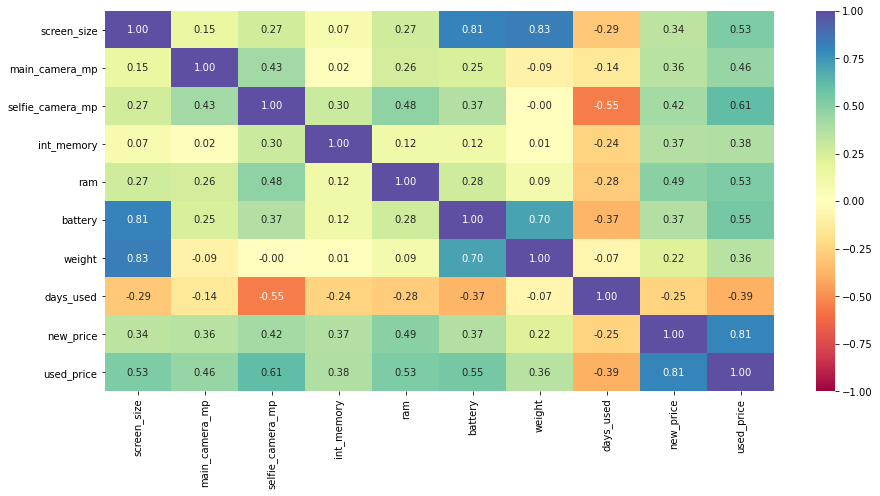

In [43]:
#Heatmap to display correlation on the attributes against each other
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

The heat map shows that screen_size has good correlation with battery and weight of the device. Its a general understanding too that if the screen size and the battery increases, the weight of the device will get increased. Other than these, the used_price has a strong correlation with the new_price of the device. But it should be carefully analyzed, since the new price of a device is more the used_price could also be more provided taking other factors into consideration.

### The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

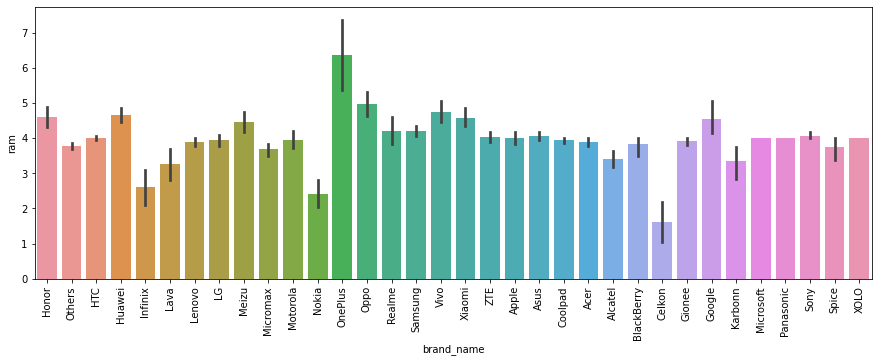

In [44]:
#Plot to show brand_name vs RAM
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='brand_name',y='ram')
plt.xticks(rotation=90)
plt.show()

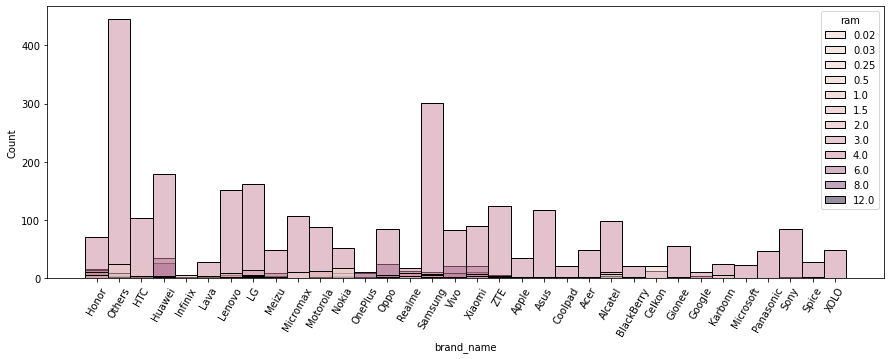

In [45]:
#Plt to show the brand_name against various RAM of the devices.
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="brand_name", hue="ram")
plt.xticks(rotation=60)
plt.show()

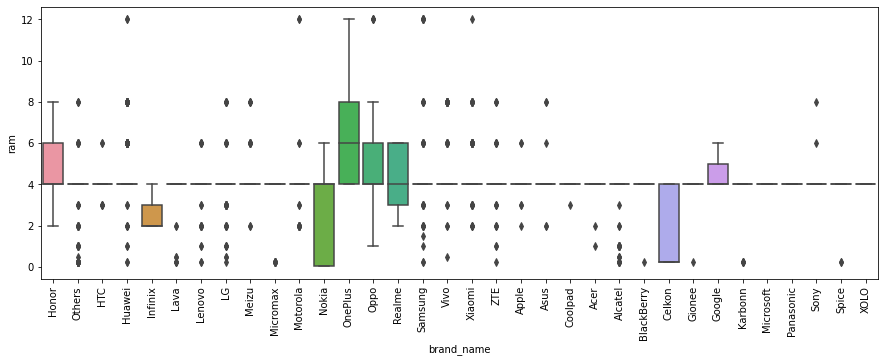

In [46]:
#df['brand_name'].value_counts()[:15].plot(kind='bar') 
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='brand_name',y='ram')
plt.xticks(rotation=90)
plt.show()

All the brands' devices has got 4GB RAM, some have as high as 12GB and some close to 0 too. Since the data spanned for a 8 years, there is high possibility of market growth and new features and advancements in the devices.

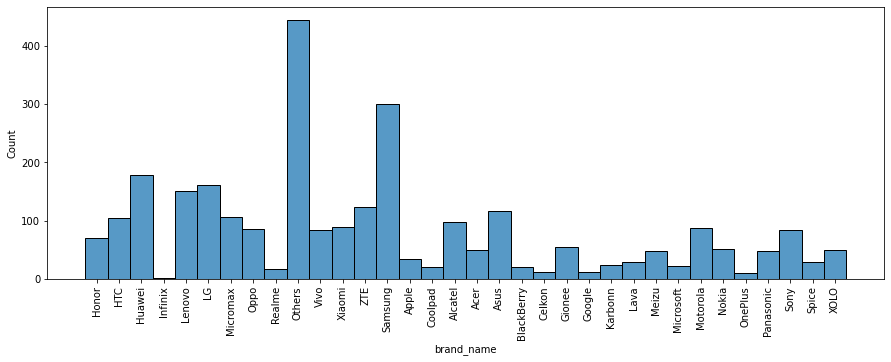

In [47]:
#Plot to show brand_name for 4GB RAM
df_ram4=df.loc[df['ram']==4]
plt.figure(figsize=(15,5))
sns.histplot(data=df_ram4,x='brand_name')
plt.xticks(rotation=90)
plt.show()

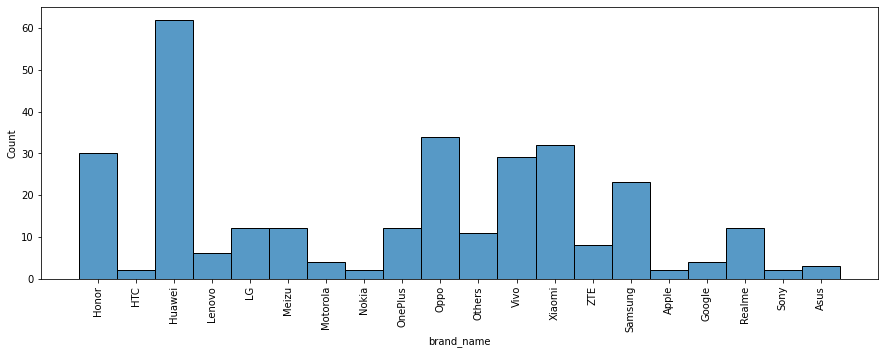

In [48]:
#Plot to show brand_name for RAM > 4GB
df_ramgt4=df.loc[df['ram']> 4]
plt.figure(figsize=(15,5))
sns.histplot(data=df_ramgt4,x='brand_name')
plt.xticks(rotation=90)
plt.show()

THe plot shows the details of brand name for all devices where the RAM is > 4GB. Huawei stands first with the highest number of devices with RAM > 4GB.

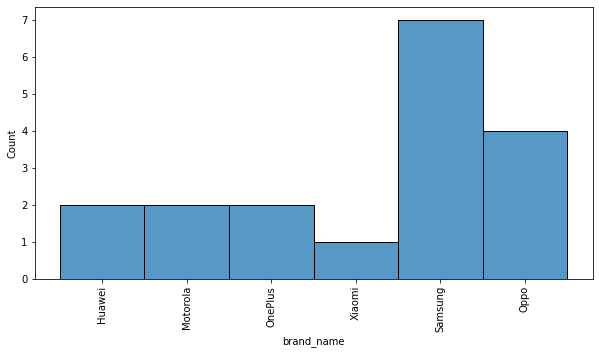

In [49]:
#Plot to show brand_name for RAM 12GB
df_ram12=df.loc[df['ram'] == 12]
plt.figure(figsize=(10,5))
sns.histplot(data=df_ram12,x='brand_name')
plt.xticks(rotation=90)
plt.show()

The plot shows that the devices with RAM =12GB is available only in Samsung, Oppo, Huawei, Motorola, OnePlus and Xiaomi brands.

### A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

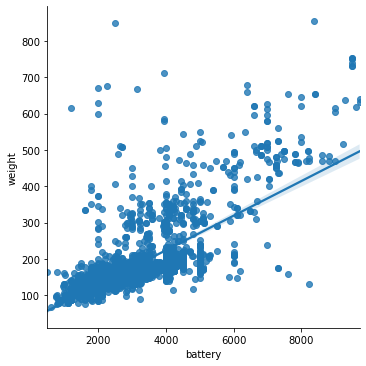

In [50]:
#Plot to check the battery vs weight of the device
sns.lmplot(data=df,x='battery',y='weight')

For the larger batteries, the weight of the device is increasing too; as expected. 

In [51]:
#Creating a dataframe with larger batteris which have >4500 mAh
df_batt = df.loc[df['battery'] > 4500]
df_batt.shape

(341, 15)

In [52]:
df_batt['brand_name'].value_counts()

Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Motorola     14
Honor        14
Vivo         13
Realme       12
LG           12
ZTE          10
Gionee       10
Acer          7
Infinix       6
Sony          6
Oppo          4
Google        1
Micromax      1
Panasonic     1
Spice         1
HTC           1
Alcatel       1
Nokia         1
Name: brand_name, dtype: int64

This shows that Samsung has more devices with battery > 4500 mAh then Others, Huawei and so on. At the lowest, Google, Panasonic, Nokie and others have only 1 device which has larger battery.

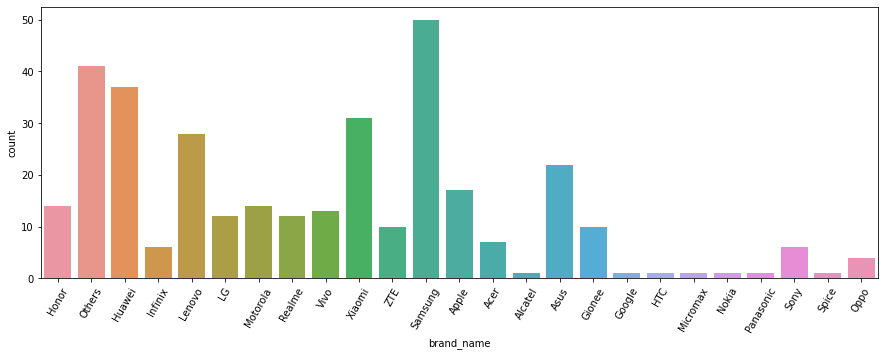

In [56]:
#Plot to show count of brand_name for the devices with larger batteries
plt.figure(figsize=(15, 5))
sns.countplot(data=df_batt,x='brand_name')
plt.xticks(rotation=60)
plt.show()

In [57]:
df_batt.groupby(df_batt['brand_name'])['weight'].mean()

brand_name
Acer        360.000
Alcatel     380.000
Apple       439.559
Asus        313.773
Gionee      209.430
Google      517.000
HTC         425.000
Honor       248.714
Huawei      394.486
Infinix     193.000
LG          366.058
Lenovo      442.721
Micromax    118.000
Motorola    200.757
Nokia       318.000
Oppo        195.000
Others      390.546
Panasonic   182.000
Realme      196.833
Samsung     398.352
Sony        439.500
Spice       158.000
Vivo        195.631
Xiaomi      231.500
ZTE         195.400
Name: weight, dtype: float64

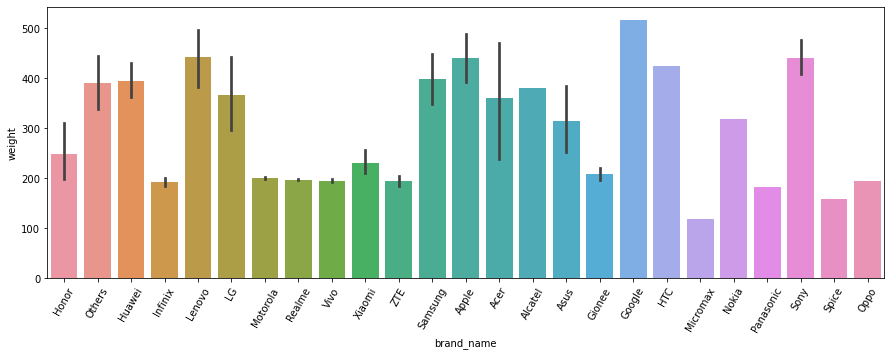

In [58]:
#Plot to compare the brand_name vs weight of the device for these larger batteris
plt.figure(figsize=(15, 5))
sns.barplot(data=df_batt,x='brand_name',y='weight')
plt.xticks(rotation=60)
plt.show()

### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [59]:
#Creating a dataframe with devices >6 inches of screen size
#Input had screen_size in cms; whcih was already converted to inches so using it directly here
df_large_screen = df.loc[df['screen_size'] > 6]
df_large_screen

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
1,Honor,Android,6.811,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,249.390,174.530
2,Honor,Android,6.571,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,359.470,165.850
3,Honor,Android,10.039,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,278.930,169.930
4,Honor,Android,6.031,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,140.870,80.640
5,Honor,Android,6.390,yes,no,13.000,8.000,64.000,4.000,4000.000,176.000,2020,223,157.700,82.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,6.012,yes,no,8.000,7.000,64.000,4.000,3110.000,194.000,2019,208,538.040,164.170
3448,Asus,Android,6.591,yes,no,NaN,24.000,128.000,8.000,6000.000,240.000,2019,325,1163.650,303.480
3449,Asus,Android,6.039,yes,no,NaN,8.000,64.000,6.000,5000.000,190.000,2019,232,654.500,89.330
3451,Alcatel,Android,6.220,yes,no,13.000,5.000,32.000,3.000,4000.000,165.000,2020,201,92.650,78.050


In [60]:
df_large_screen.shape

(1099, 15)

There are 1099 devices which have screen size greater than 6 inches.

In [61]:
df_large_screen['brand_name'].value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Lenovo        69
Xiaomi        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
Meizu         17
ZTE           17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
Micromax       7
HTC            7
Google         4
Coolpad        3
XOLO           3
Gionee         3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

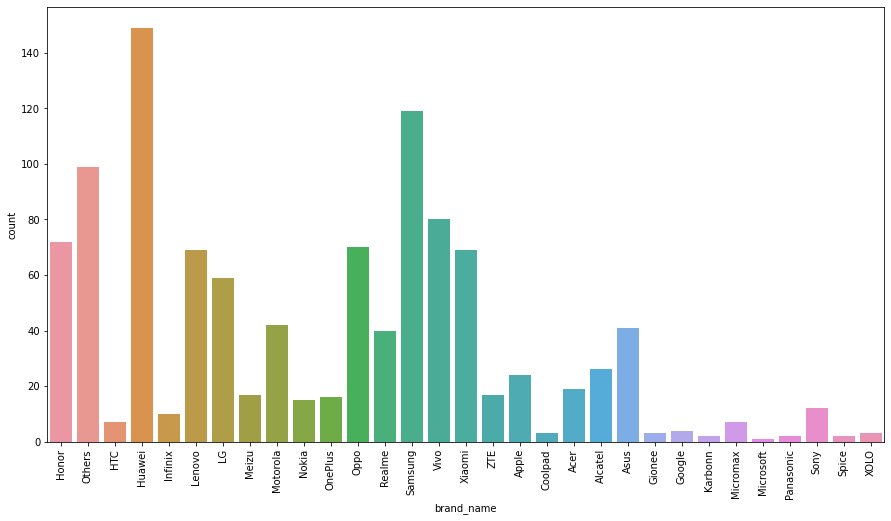

In [62]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_large_screen,x='brand_name')
plt.xticks(rotation=90)
plt.show()

Huawei has maximum number of devices with screen size greater than 6 inches, followed by Samsung. The least being the Microsoft with 1 device.

### Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

In [63]:
#From the entire list of devices, finding out the devices which have greater than 8MP selfie cameras
df_selfie_camera = df.loc[df['selfie_camera_mp'] > 8]
df_selfie_camera.shape

(655, 15)

In [64]:
df_selfie_camera['brand_name'].value_counts()

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
OnePlus       18
Realme        18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Panasonic      2
Micromax       2
Acer           1
Name: brand_name, dtype: int64

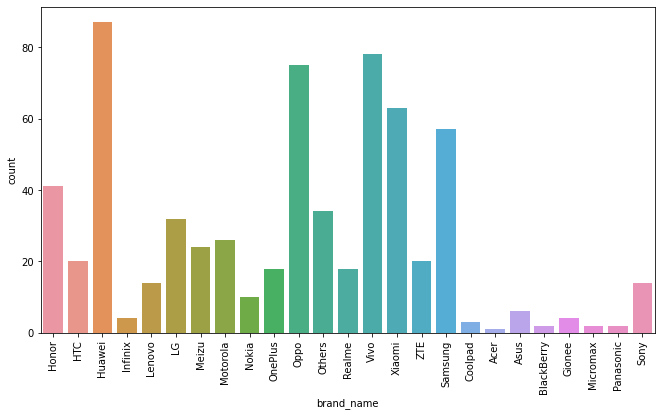

In [65]:
plt.figure(figsize=(11,6))
sns.countplot(data=df_selfie_camera,x='brand_name')
plt.xticks(rotation=90)
plt.show()

From the count plot above, it shows Huawei has the most number of devices which have >8MP selfie camera and next is with Vivo.

In [66]:
#From the entire list of devices, finding out the devices which have greater than 12MP main cameras
df_main_camera = df.loc[df['main_camera_mp'] > 12]
df_main_camera.shape

(1328, 15)

In [67]:
df_main_camera['brand_name'].value_counts()

Huawei        131
Others        127
Honor          97
Vivo           95
Samsung        93
ZTE            86
LG             66
Lenovo         64
Asus           62
HTC            62
Xiaomi         62
Oppo           55
Sony           53
Motorola       50
Meizu          39
Gionee         26
Alcatel        23
Panasonic      22
Micromax       19
Nokia          16
Google         14
Acer           11
Coolpad        11
XOLO            8
Microsoft       8
Karbonn         7
BlackBerry      6
Realme          5
Lava            5
OnePlus         5
Name: brand_name, dtype: int64

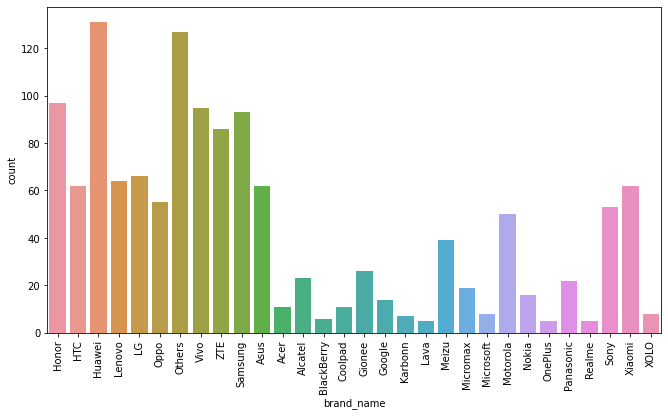

In [68]:
plt.figure(figsize=(11,6))
sns.countplot(data=df_main_camera,x='brand_name')
plt.xticks(rotation=90)
plt.show()

From the count plot above, it shows Huawei has the most number of devices which have >8MP selfie camera and next is with Vivo.

### Which attributes are highly correlated with the price of a used device?

In [69]:
df.groupby(df['brand_name'])['used_price'].mean().sort_values(ascending=False)

brand_name
OnePlus      183.224
Apple        172.015
Google       138.597
Oppo         130.044
Vivo         126.787
Xiaomi       122.796
Huawei       122.437
Honor        114.489
Meizu        108.287
Realme       107.493
Sony         101.722
Samsung      101.570
Asus          98.752
Motorola      91.344
HTC           88.801
Gionee        88.592
Lenovo        87.475
ZTE           86.898
Coolpad       84.915
LG            84.610
Infinix       81.126
BlackBerry    80.341
Microsoft     75.839
Others        75.384
Acer          73.611
Panasonic     71.297
Nokia         61.761
Alcatel       60.090
XOLO          53.539
Lava          51.868
Micromax      50.305
Karbonn       49.287
Spice         44.024
Celkon        32.211
Name: used_price, dtype: float64

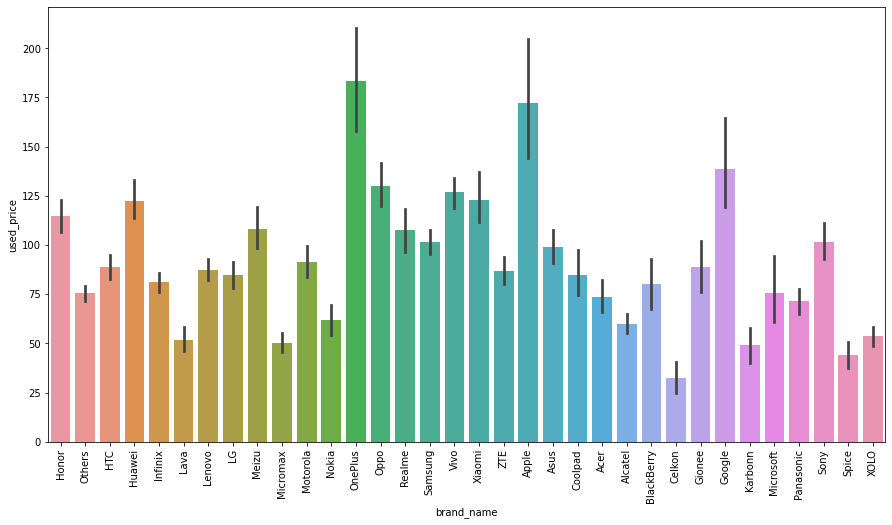

In [70]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='brand_name',y='used_price')
plt.xticks(rotation=90)
plt.show()

OnePlus have devices with the highest average used_price of 183 euros, followed by Apple with 172 euros. The least average used price is for Celkon with 32 euros.

<AxesSubplot:xlabel='release_year', ylabel='used_price'>

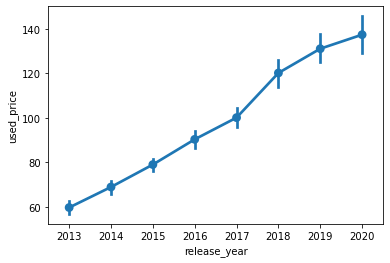

In [71]:
#PLot to show used_price vs release_year
sns.pointplot(data=df,x='release_year',y='used_price')

The plot shows the used_price has increased over the years; its quite understandable since as years pass there could be phones with more features and the used_price or new_price increases.

<AxesSubplot:xlabel='used_price', ylabel='new_price'>

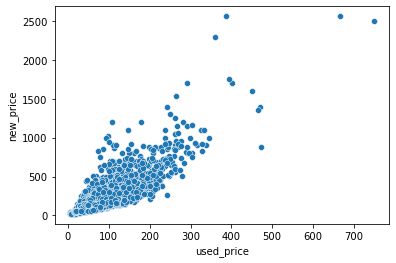

In [72]:
sns.scatterplot(data=df,x='used_price',y='new_price')

The devices will ofcourse have higher used_price if the original new_price is more.

<AxesSubplot:xlabel='days_used', ylabel='used_price'>

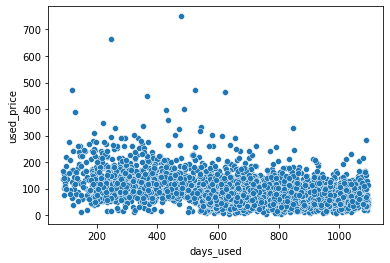

In [73]:
sns.scatterplot(data=df,y='used_price',x='days_used')

Used_price is not really showing any correlation with the number of days used.

<AxesSubplot:xlabel='used_price', ylabel='battery'>

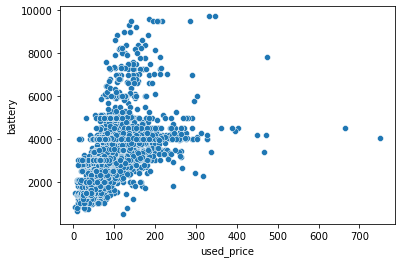

In [74]:
sns.scatterplot(data=df,x='used_price',y='battery')

The plot shows as the battery capacity is increasing the used_price is also relatively increasing. THis could be explained, because devices with more capacity are manufactured for better experience and the price also icnreases.

<AxesSubplot:xlabel='used_price', ylabel='ram'>

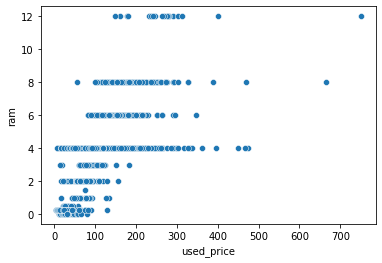

In [75]:
sns.scatterplot(data=df,x='used_price',y='ram')

THe plot doesnt show any direct correlation between used_price and ram.

<AxesSubplot:xlabel='used_price', ylabel='os'>

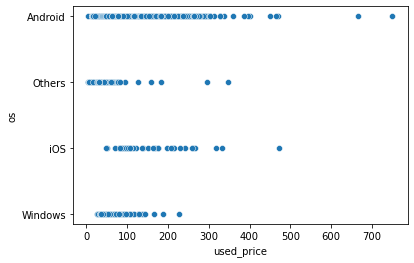

In [76]:
sns.scatterplot(data=df,x='used_price',y='os')

The plot shows, compared to Windows, Android have devices with higher used_prices.

<AxesSubplot:xlabel='used_price', ylabel='screen_size'>

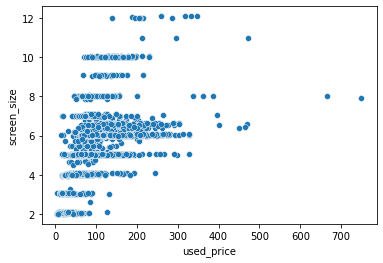

In [77]:
sns.scatterplot(data=df,x='used_price',y='screen_size')

The plot shows majority of the data in our dataset has devices with around 6inch screens. And there doesnt seem to be any direct correlation of used price with screen_size.

## Data Preprocessing

### Missing Value Treatment

In [78]:
df.isna().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [79]:
#Missing values are filled with the median values, for the respective brand_name and release-year level
df1 = df.copy()

cols_to_treat = ["main_camera_mp","selfie_camera_mp", "int_memory","ram","battery","weight"]

for col in cols_to_treat:
    df1[col] = df1.groupby(["brand_name", "release_year"])[col].transform(
        lambda x: x.fillna(x.median()))


In [80]:
#Checking missing values
df1.isna().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            0
ram                   0
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [81]:
#For the remaining missing values, it is filled with median of the feature at just brand-name level
df1[["main_camera_mp","selfie_camera_mp","battery","weight"]] = df1.groupby(["brand_name"])[
    ["main_camera_mp","selfie_camera_mp", "battery","weight"]
].transform(lambda x: x.fillna(x.median()))

In [82]:
#Checking missing values
df1.isna().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
dtype: int64

In [83]:
#For the rest out missing values in main_camera_mp, it is filled wiht the. median of the entire feature
df1['main_camera_mp'].fillna(df1['main_camera_mp'].median(), inplace=True) 

In [84]:
# Checking missing values 
df1.isna().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [85]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,5.709,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,111.620,74.260
1,Honor,Android,6.811,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,249.390,174.530
2,Honor,Android,6.571,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,359.470,165.850
3,Honor,Android,10.039,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,278.930,169.930
4,Honor,Android,6.031,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,140.870,80.640


### Outlier detection

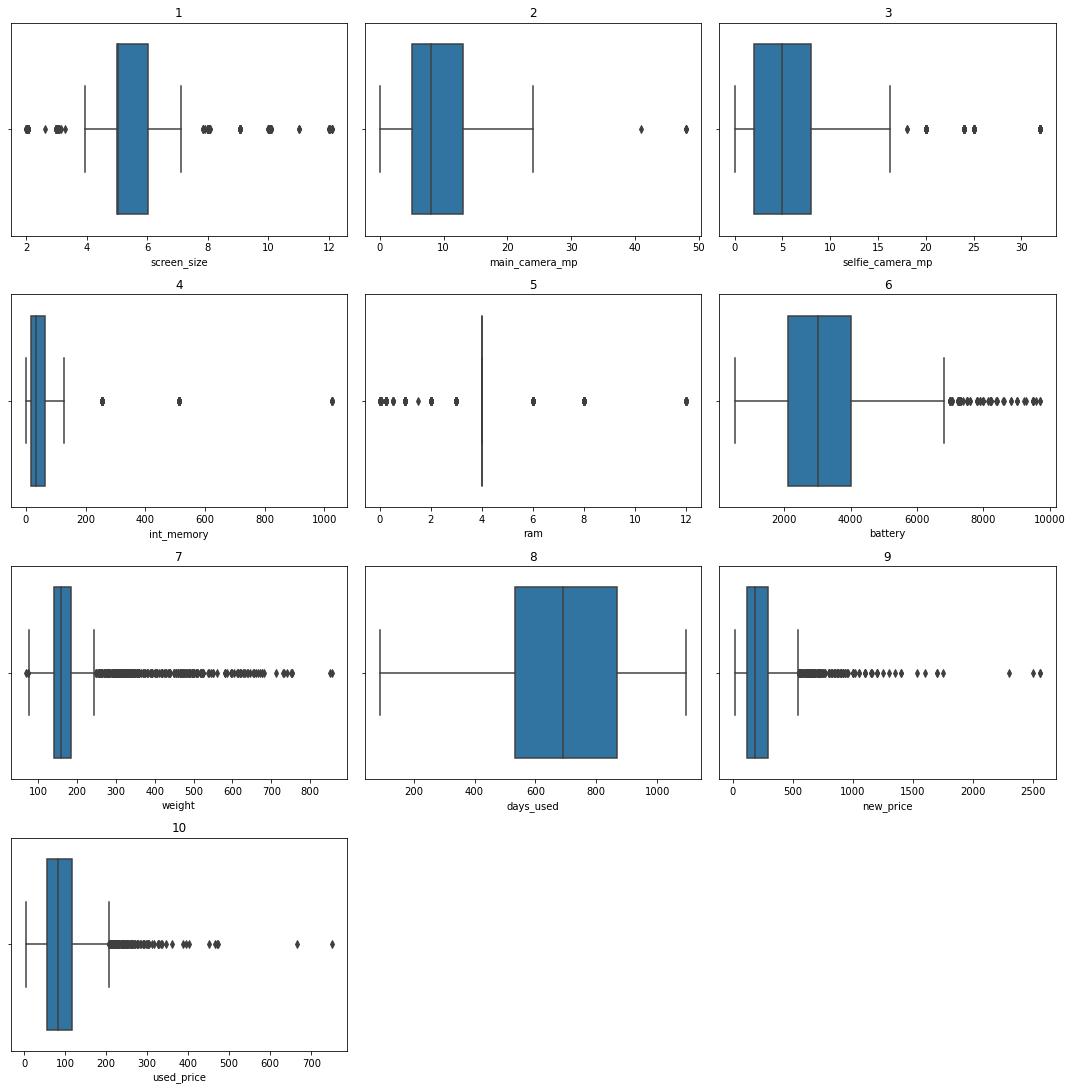

In [86]:
# Detecting outliers in the data using boxplot
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")
plt.figure(figsize=(15, 45))

#for i, variable in enumerate(cols_list):
for i in range(len(cols_list)):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(data=df1, x=cols_list[i])#, kde=True) 
#    cols_list.plot(kind='box',subplots=False, ax=axis)
    plt.tight_layout()
    plt.title(i+1)
plt.show()

The above plots show the box plot of each of the numerical variables in the dataset. THe box plots show some outliers for almost all the features but all those look valid.
Observations:
1. The screen size ofcourse could vary from a 2inch for some older models to the newest devices with 12 inches.
2. The main camera and selfie camera mega pixel has gone upto 48mp and 32 mp for the newer devices; so those are valid data too.
3. Internal memory going up to 1024GB is no wonder, for the devices and RAM could be very well till 12GB. Those are not invalid too.
4. Battery capacity, with the growing features in the smart devices; the capacity of battery as well has increased. The data looked valid.
5. As screen size is more, the weight of the devices could grow too and the values till 800gms is nothing to worry about.
6. The used price and new price of the devices, there are some entries with very high prices which could very well be valid. 

In [87]:
quartiles = np.quantile(df1['battery'][df1['battery'].notnull()], [.25, .75])
feature_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {feature_4iqr}')
outlier_batteries = df1.loc[np.abs(df1['battery'] - df1['battery'].median()) > feature_4iqr, 'battery']
outlier_batteries

Q1 = 2100.0, Q3 = 4000.0, 4*IQR = 7600.0


Series([], Name: battery, dtype: float64)

The dataset doesnt have any Outliers on 'battery' feature when difference from Median is comapred with 4 times the Inter quartile range of the values.

In [88]:
quartiles = np.quantile(df1['weight'][df1['weight'].notnull()], [.25, .75])
feature_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {feature_4iqr}')
outlier_weights = df1.loc[np.abs(df1['weight'] - df1['weight'].median()) > feature_4iqr, 'weight']
print(f'Numer of rows with Weights of devices identified as Outliers = {outlier_weights.shape}')

Q1 = 142.0, Q3 = 185.0, 4*IQR = 172.0
Numer of rows with Weights of devices identified as Outliers = (217,)


The dataset here contains number of devices, mobiles and tablets inclusive; so the weights can very well vary till around 850 grams. As per my research and understanding these are not treated as Outliers.

In [89]:
quartiles = np.quantile(df1['screen_size'][df1['screen_size'].notnull()], [.25, .75])
feature_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {feature_4iqr}')
outlier_screen_sizes = df1.loc[np.abs(df1['screen_size'] - df1['screen_size'].median()) > feature_4iqr, 'screen_size']
print(f'Numer of rows with screen size values identified as Outliers = {outlier_screen_sizes.shape}')

Q1 = 5.0, Q3 = 6.039370078740157, 4*IQR = 4.15748031496063
Numer of rows with screen size values identified as Outliers = (120,)


The dataset here contains number of devices, mobiles and tablets inclusive; so the screen sizes can very well vary till 12 inches. As per my understanding and domain knowledge, i dont want to consider these as Outliers.

In [90]:
quartiles = np.quantile(df1['int_memory'][df1['int_memory'].notnull()], [.25, .75])
feature_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {feature_4iqr}')
outlier_int_memories = df1.loc[np.abs(df1['int_memory'] - df1['int_memory'].median()) > feature_4iqr, 'int_memory']
print(f'Numer of rows with Internal memory values identified as Outliers = {outlier_int_memories.shape}')

Q1 = 16.0, Q3 = 64.0, 4*IQR = 192.0
Numer of rows with Internal memory values identified as Outliers = (138,)


Here as well I dont want to consider the values of 256, 512, 1024GB as outliers; as the Market is evolving the new devices are ofcourse made with high internal memory and these are valid values.

In [91]:
quartiles = np.quantile(df1['ram'][df1['ram'].notnull()], [.25, .75])
feature_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {feature_4iqr}')
outlier_ram_vals = df1.loc[np.abs(df1['ram'] - df1['ram'].median()) > feature_4iqr, 'ram']
print(f'Numer of rows with RAM values identified as Outliers = {outlier_ram_vals.shape}')

Q1 = 4.0, Q3 = 4.0, 4*IQR = 0.0
Numer of rows with RAM values identified as Outliers = (639,)


The dataset has maximum number of devices with 4GB RAM and hence the 1st and 3rd quartile values came to be the same and Inter quartile range became 0. But ideally, the dataset has multiple devices with a range of RAM; and none of the data is non-sensical so I am not treating these as Outliers.

In [92]:
quartiles = np.quantile(df1['new_price'][df1['new_price'].notnull()], [.25, .75])
feature_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {feature_4iqr}')
outlier_new_prices = df1.loc[np.abs(df1['new_price'] - df1['new_price'].median()) > feature_4iqr, 'new_price']
print(f'Numer of rows with New price values identified as Outliers = {outlier_new_prices.shape}')

Q1 = 120.3425, Q3 = 291.115, 4*IQR = 683.09
Numer of rows with New price values identified as Outliers = (55,)


The dataset here contains number of devices from various different brands and price depends on various features of the device. As per my research and understanding these values in New price are not treated as Outliers.

## Data Preprocessing

### Feature Engineering

In [93]:
#A new feature is derived based on the new_price of the devices; tagging them as Low, Medium and High 
df1["price_range"] = pd.cut(
    x=df1.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Low", "Medium", "High"],
)

df1["price_range"].value_counts()

Low       1844
Medium    1025
High       585
Name: price_range, dtype: int64

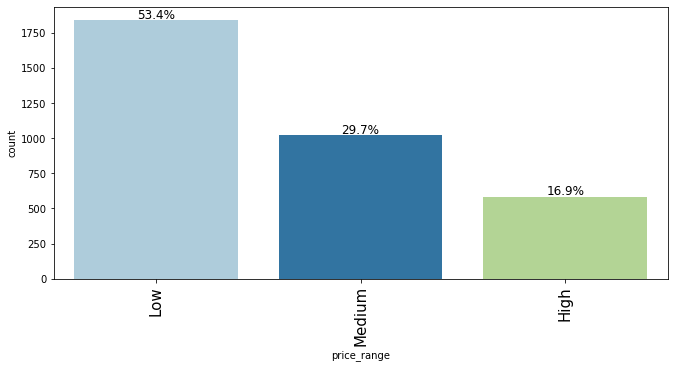

In [94]:
#plot on some the new feature 'price_range'
labeled_barplot(df1,"price_range",perc=True,n=10)
plt.show()

As per the new categoryl 53.4% of the devices are in Low price range; meaning <200 euros. 

29.7% of devices' price is between 200 and 350 euros. 

16.9% devices are in high price range, which is above 350 euros

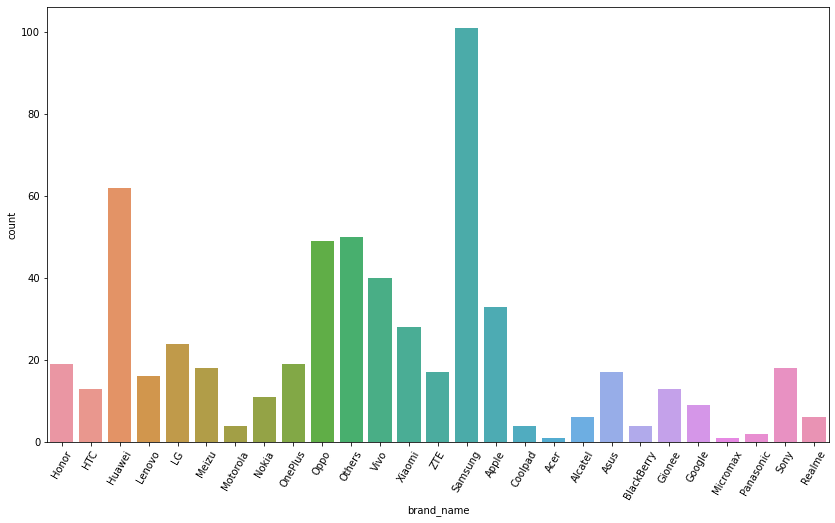

In [95]:
#Plotting this new feature against brand_name for HIGH price range
plt.figure(figsize=(14,8))
df1_high = df1.loc[df1['price_range']=='High']
sns.countplot(data=df1_high,x='brand_name')
plt.xticks(rotation=60)
plt.show()

The plot shows the details of brand_name for devices with Highes price range. Samsung as the highest number of devices which are above 350 euros and next is Huawei.

In [96]:
df1['price_range'].value_counts()

Low       1844
Medium    1025
High       585
Name: price_range, dtype: int64

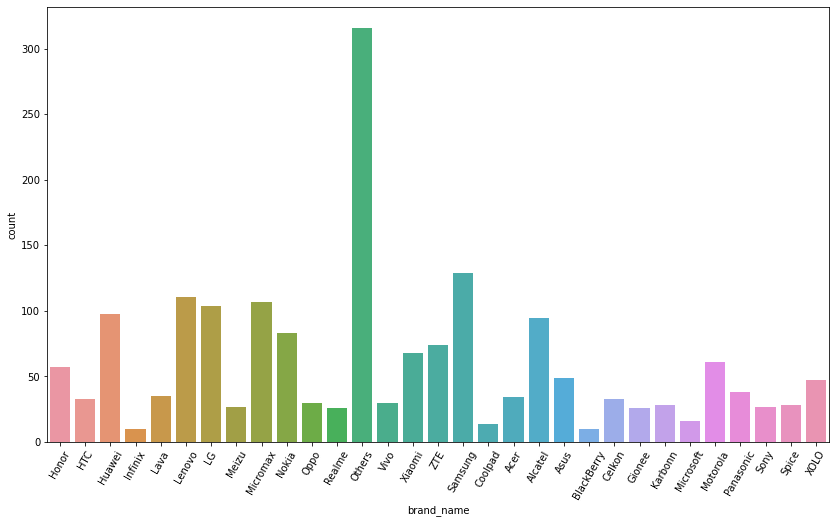

In [97]:
#Plotting this new feature against brand_name for Low price range
plt.figure(figsize=(14,8))
df1_low = df1.loc[df1['price_range']=='Low']
sns.countplot(data=df1_low,x='brand_name')
plt.xticks(rotation=60)
plt.show()

Similary this above plot shows the brand names of the devices which are in low price range. Others being the highest and next is Samsung.

<AxesSubplot:xlabel='price_range', ylabel='main_camera_mp'>

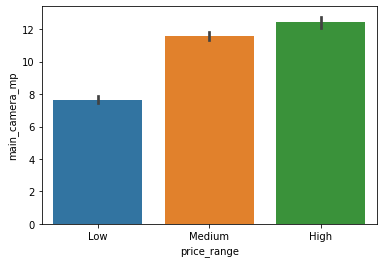

In [98]:
sns.barplot(data=df1,y='main_camera_mp',x='price_range')

<AxesSubplot:xlabel='price_range', ylabel='main_camera_mp'>

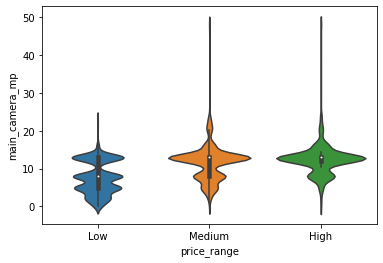

In [99]:
sns.violinplot(data=df1,y='main_camera_mp',x='price_range')

The Bar plot and Violin plot shows the main_camera_mp against price_range; both medium and high price range devices has got higher main camera megapixel. There are however many that still fall within 12 MP; so high price is not just dependent on the main camera MP but various other factors too.

<AxesSubplot:xlabel='price_range', ylabel='weight'>

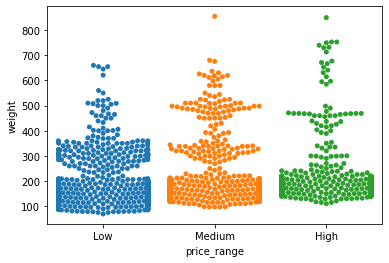

In [100]:
sns.swarmplot(data=df1,y='weight',x='price_range')

The swarmplot shows many datapoints in every price_range category are at 100-200 grams, so the majority of devcies in our dataset are around 100-200 grams weight. For High price range devices, the weight increased to around 850 grams too.

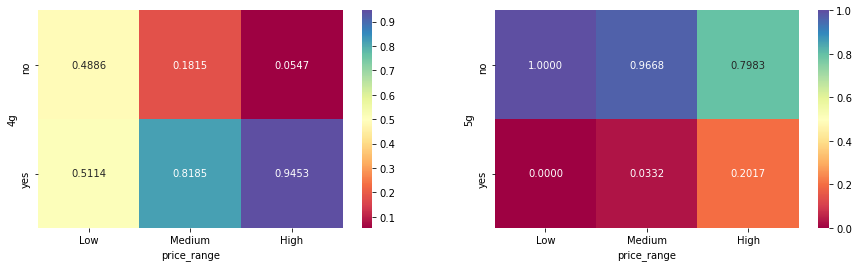

In [101]:
#Plot to find a correalation of 4G and 5G against price_range
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df1["4g"], df1["price_range"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap(pd.crosstab(df1["5g"], df1["price_range"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.show()

From the correlation of 4G vs price_range; it is shown that as devices support 4G the price has increased. 

But with the correlation of 5G vs price_range; it shows a strong correlation that devices whcih dont support 5G are expensive. BUt we have very less data for devices which support 5G, so cant really take this observation into account. Generally, the newer devices whcih are brought into market that support 5G, along with various other new features are expensive.

In [102]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,price_range
0,Honor,Android,5.709,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,111.620,74.260,Low
1,Honor,Android,6.811,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,249.390,174.530,Medium
2,Honor,Android,6.571,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,359.470,165.850,High
3,Honor,Android,10.039,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,278.930,169.930,Medium
4,Honor,Android,6.031,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,140.870,80.640,Low


### Transformation of features

While doing Univaraite analysis; there are certain features identified which are highly skewed. SO applying a log transformation to check if the values could be brought closer and then use this log feature in the model.

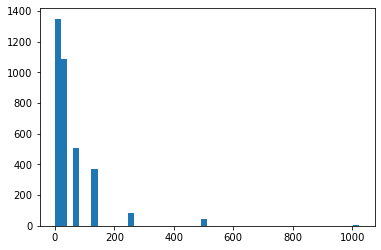

In [103]:
#Plot of int_memory attribute 
plt.hist(df1['int_memory'], 50)
plt.show()

In [104]:
#checking with log transformation of int_memory attribute
df1["int_memory_log"] = np.log(df1["int_memory"] + 1)

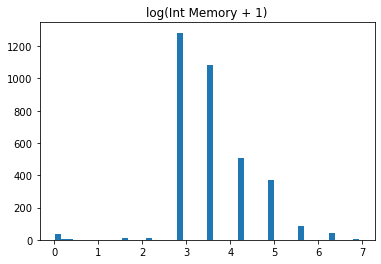

In [105]:
plt.hist(df1['int_memory_log'], 50)
plt.title('log(Int Memory + 1)')
plt.show()

The log transformation decreased the scale of the distributions, even with the huge range of int_memory. It seems there is still be a bit skewed, but it is closer to normal than the original distribution.

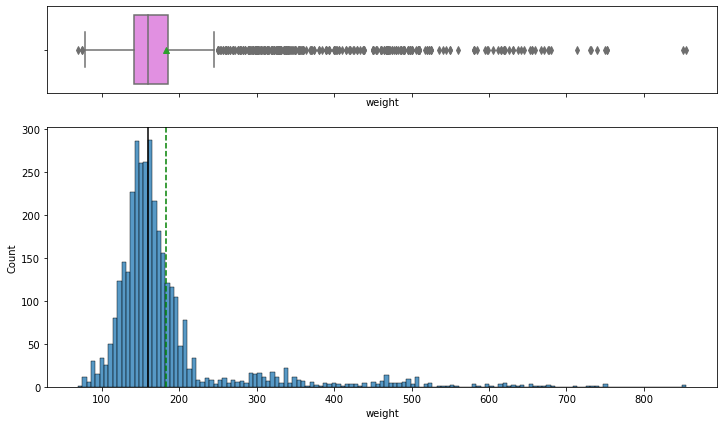

In [106]:
#Plot of weight
histogram_boxplot(df1,'weight')

In [107]:
#log transformation of weight attribute
df1["weight_log"] = np.log(df1["weight"])

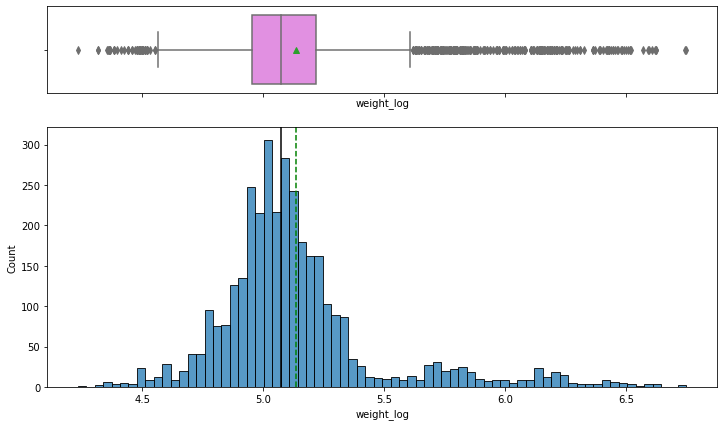

In [108]:
#Plotting log transformation of weight
histogram_boxplot(df1,'weight_log')

There is some skweness still towards the right; but the curve is better in symmetry with log transformation than the original.

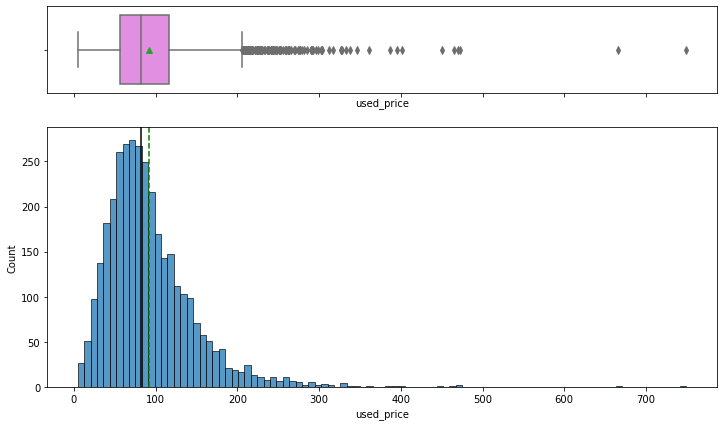

In [109]:
#Plotting used_price using a histogram and box plot combination
histogram_boxplot(df1, 'used_price')

In [110]:
#log transformation of used_price attribute
df1["used_price_log"] = np.log(df1["used_price"])

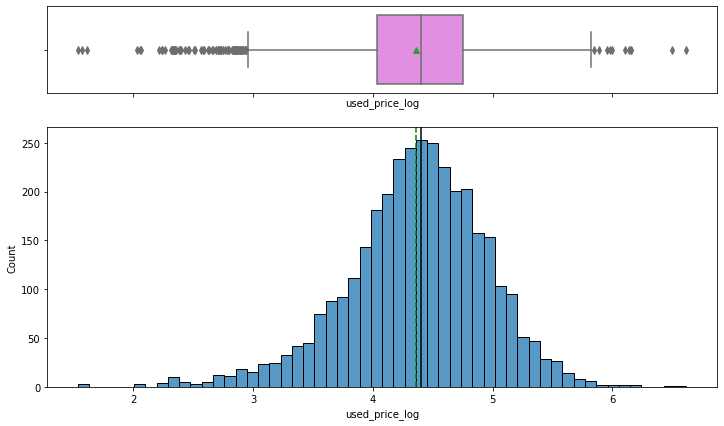

In [111]:
#Plotting used_price_log using a histogram and box plot combination
histogram_boxplot(df1, 'used_price_log')

After log transformation, there is still some skewness in the data. But the plot looks much better compared to the actual values.
The mean and median values are also very close to each other.

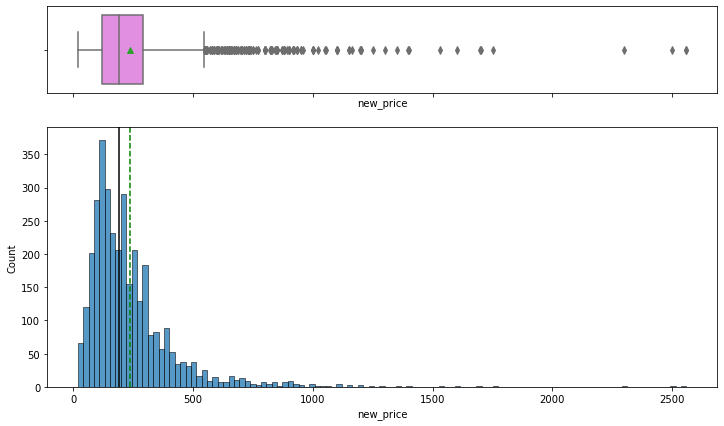

In [112]:
#Plotting new_price using a histogram and box plot combination
histogram_boxplot(df1, 'new_price')

In [113]:
#log transformation of new_price attribute
df1["new_price_log"] = np.log(df1["new_price"])

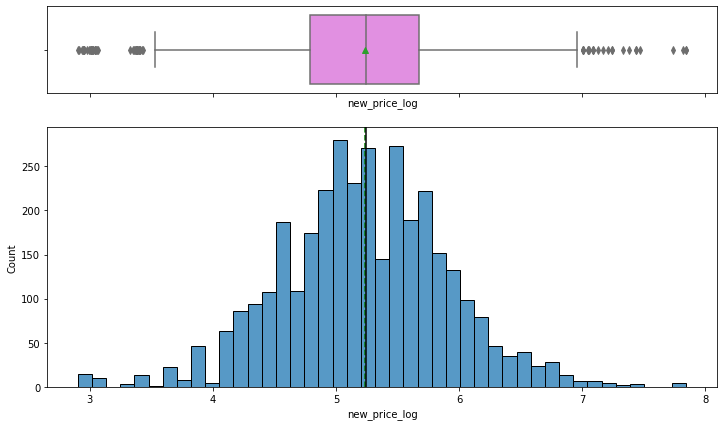

In [114]:
#Plotting new_price_log using a histogram and box plot combination
histogram_boxplot(df1, 'new_price_log')

After log transformation, the curve looks much better now. The mean and median values are almost at the same value and the distribution is close to normal.

In [115]:
df1.shape

(3454, 20)

In [116]:
df2=df1.copy()

In [117]:
df2.shape

(3454, 20)

In [118]:
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,price_range,int_memory_log,weight_log,used_price_log,new_price_log
0,Honor,Android,5.709,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,111.620,74.260,Low,4.174,4.984,4.308,4.715
1,Honor,Android,6.811,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,249.390,174.530,Medium,4.860,5.361,5.162,5.519
2,Honor,Android,6.571,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,359.470,165.850,High,4.860,5.361,5.111,5.885
3,Honor,Android,10.039,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,278.930,169.930,Medium,4.174,6.174,5.135,5.631
4,Honor,Android,6.031,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,140.870,80.640,Low,4.174,5.220,4.390,4.948


In [119]:
df2.isna().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
price_range         0
int_memory_log      0
weight_log          0
used_price_log      0
new_price_log       0
dtype: int64

In [120]:
#Dropping features whcih are transformed to log and the new feature 'price_range' added
cols_transformed = ['weight','used_price', 'new_price', 'int_memory','price_range']
df2.drop(cols_transformed, axis=1, inplace=True)

In [121]:
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,int_memory_log,weight_log,used_price_log,new_price_log
0,Honor,Android,5.709,yes,no,13.000,5.000,3.000,3020.000,2020,127,4.174,4.984,4.308,4.715
1,Honor,Android,6.811,yes,yes,13.000,16.000,8.000,4300.000,2020,325,4.860,5.361,5.162,5.519
2,Honor,Android,6.571,yes,yes,13.000,8.000,8.000,4200.000,2020,162,4.860,5.361,5.111,5.885
3,Honor,Android,10.039,yes,yes,13.000,8.000,6.000,7250.000,2020,345,4.174,6.174,5.135,5.631
4,Honor,Android,6.031,yes,no,13.000,8.000,3.000,5000.000,2020,293,4.174,5.220,4.390,4.948


In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   object  
 1   os                3454 non-null   object  
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3454 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   ram               3454 non-null   float64 
 8   battery           3454 non-null   float64 
 9   release_year      3454 non-null   int64   
 10  days_used         3454 non-null   int64   
 11  int_memory_log    3454 non-null   float64 
 12  weight_log        3454 non-null   float64 
 13  used_price_log    3454 non-null   float64 
 14  new_price_log     3454 non-null   float64 
dtypes: category(2), float64(9), int64(2), object(2)
memory usage: 357.9+ KB


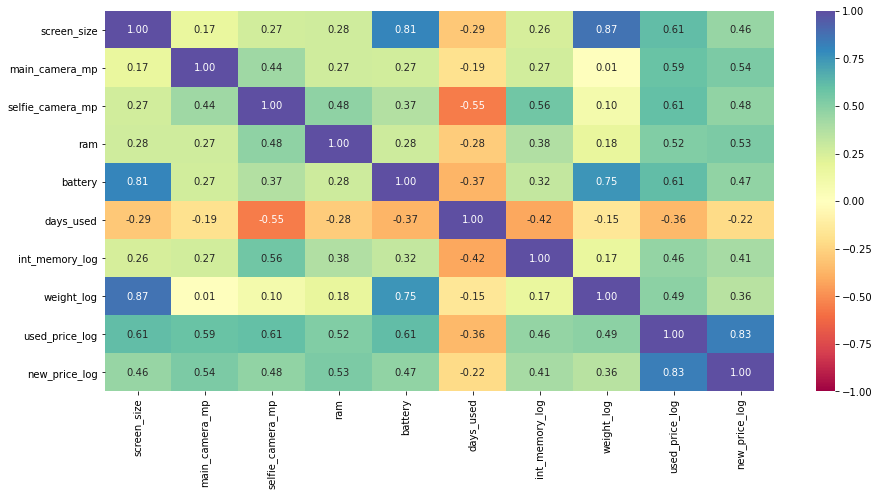

In [123]:
#Heatmap to display correlation on the attributes against each other
cols_list = df2.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Building a Linear Regression model

In [124]:
# define dependent variable
X = df2.drop(["used_price_log"], axis=1)
y = df2["used_price_log"]

In [125]:
# let's add the intercept to data
X = sm.add_constant(X)

In [126]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,int_memory_log,weight_log,new_price_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.000,5.709,13.000,5.000,3.000,3020.000,2020.000,127.000,4.174,4.984,4.715,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,1.000,6.811,13.000,16.000,8.000,4300.000,2020.000,325.000,4.860,5.361,5.519,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
2,1.000,6.571,13.000,8.000,8.000,4200.000,2020.000,162.000,4.860,5.361,5.885,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
3,1.000,10.039,13.000,8.000,6.000,7250.000,2020.000,345.000,4.174,6.174,5.631,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
4,1.000,6.031,13.000,8.000,3.000,5000.000,2020.000,293.000,4.174,5.220,4.948,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [127]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [128]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [129]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     273.8
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:02:05   Log-Likelihood:                 143.20
No. Observations:                2417   AIC:                            -188.4
Df Residuals:                    2368   BIC:                             95.32
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -41.57

From the model summary, the R-square is 0.847 which signifies the model is good fit.

Constant COeffecient: It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient which is -41.57 in this model.

## Model performance evaluation

In [130]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [131]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228,0.178,0.847,0.844,4.269


In [132]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237,0.184,0.844,0.837,4.467


**Observations**

- The training $R^2$ is 0.847, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict used price of the devices within a mean error of 0.18 euros on the test data.

- MAPE of 4.46 on the test data means that we are able to predict within 4.4% of the used price of the devices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### TEST FOR MULTICOLLINEARITY
Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

Variance Inflation Factor (VIF): Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient  𝛽𝑘  is "inflated" by the existence of correlation among the predictor variables in the model.

If VIF is 1, then there is no correlation among the  𝑘 th predictor and the remaining predictor variables, and hence, the variance of  𝛽𝑘  is not inflated at all.
General Rule of thumb:

If VIF is between 1 and 5, then there is low multicollinearity.
If VIF is between 5 and 10, we say there is moderate multicollinearity.
If VIF is exceeding 10, it shows signs of high multicollinearity.

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [134]:
checking_vif(x_train)

,feature,VIF
0,const,3832799.330
1,screen_size,7.105
2,main_camera_mp,2.247
3,selfie_camera_mp,2.892
4,ram,2.261
5,battery,4.055
6,release_year,4.936
7,days_used,2.653
8,int_memory_log,2.133
9,weight_log,6.126


### Removing columns with high Multi Collinearity

In [135]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [136]:
col_list = [
    "screen_size",
    "weight_log"]
#"brand_name_Apple", brand_name_Huawei","brand_name_Others","brand_name_Samsung" also have a VIF >5 
#but these are the Dummies of a Categorical column 'brand_name'.

#Also "os_iOS" has VIF >5, but this is part of Dummies from 'os' column.
#Removing some of the dummies doesnt make sense when they are part of a categorical column, so not dropping them.

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.842,0.232
1,weight_log,0.838,0.235


Dropping weight_log column will have more impact on the model prediction.
So will drop screen_size and check the VIF again.

In [137]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,3759527.059
1,main_camera_mp,2.246
2,selfie_camera_mp,2.889
3,ram,2.261
4,battery,3.743
5,release_year,4.853
6,days_used,2.648
7,int_memory_log,2.128
8,weight_log,3.090
9,new_price_log,3.123


After dropping screen_size the VIF of weight_log came down to <5. Now the only columns that have high VIF are those that are part of the Dummies of another feature. So nothing else to drop now.

Now the above predictors have no multicollinearity and the assumption is satisfied.
we will check the model summary.

In [138]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     274.0
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:02:28   Log-Likelihood:                 121.84
No. Observations:                2417   AIC:                            -147.7
Df Residuals:                    2369   BIC:                             130.3
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -49.82

**Observations**

- We can see that adj. R-squared has dropped from 0.844 to 0.842, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.


### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good!


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **-49.8204**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `RAM` is **0.0199**.


4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

Verifying the features with > 0.05 P-Value; dropping them one by one and checking the P-Value.
From the above model summary, other than the Dummies of the categorical features; 'battery', 'days_used' and 'int_memory_log' features have p-value > 0.05; so removing one after the other and cehcking the model summary.

In [139]:
x_train3=x_train2.drop('battery',axis=1)
x_test3=x_test2.drop('battery',axis=1)

In [140]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     279.9
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:02:32   Log-Likelihood:                 121.18
No. Observations:                2417   AIC:                            -148.4
Df Residuals:                    2370   BIC:                             123.8
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -47.75

After removing battery; model summary is checked and still days_used has p-value > 0.05; so dropping 'days_used' too.

In [141]:
x_train4=x_train3.drop('days_used',axis=1)
x_test4=x_test3.drop('days_used',axis=1)

In [142]:
olsmod3 = sm.OLS(y_train, x_train4).fit()
print(olsmod3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     286.0
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:02:34   Log-Likelihood:                 120.35
No. Observations:                2417   AIC:                            -148.7
Df Residuals:                    2371   BIC:                             117.7
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -41.31

Dropping int_memory_log too, as p-value is >0.05

In [143]:
x_train5=x_train4.drop('int_memory_log',axis=1)
x_test5=x_test4.drop('int_memory_log',axis=1)

In [144]:
olsmod4 = sm.OLS(y_train, x_train5).fit()
print(olsmod4.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     292.1
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:02:36   Log-Likelihood:                 118.50
No. Observations:                2417   AIC:                            -147.0
Df Residuals:                    2372   BIC:                             113.6
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -45.14

**Now none of the features has p-value greater than 0.05, so we'll consider the features in *x_train5* as the final set of predictor variables and *olsmod4* as final model.**

**Observations**

* Now adjusted R-squared is 0.841, i.e., our model is able to explain ~84% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.844. This shows that the variables we dropped were not affecting the model much.

### TEST FOR LINEARITY AND INDEPENDENCE

In [145]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod4.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod4.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087,3.870,0.218
1525,4.448,4.689,-0.241
1128,4.315,4.349,-0.034
3003,4.282,4.195,0.087
2907,4.456,4.465,-0.008


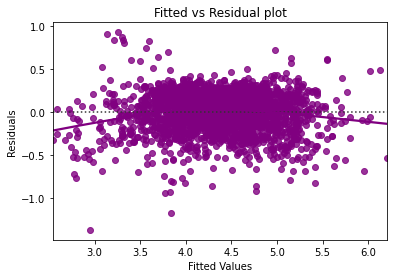

In [146]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* **There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

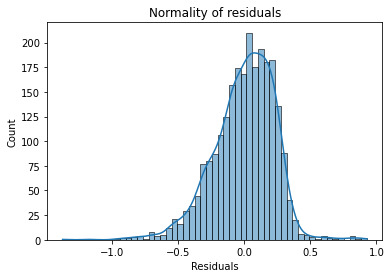

In [147]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

This is almost a bell curve, showing a normal distribution.

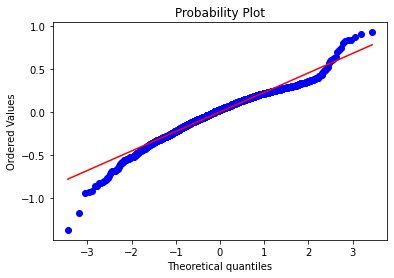

In [148]:
#Verifying further using a Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Th residuals are almost falling on the straight line, except for the tails.

In [149]:
#Further checking with Shaprio-Wilks test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9695976972579956, pvalue=3.205268328093296e-22)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking with a Statistical test, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

In [150]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train5)
lzip(name, test)

[('F statistic', 1.0447990145056236), ('p-value', 0.22740463260325966)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**All the assumptions of linear regression are verified and they are satisfied, let's go ahead with prediction.**

In [151]:
# predictions on the test set
pred = olsmod4.predict(x_test5)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.567,4.358
2341,3.696,3.992
1913,3.592,3.581
688,4.306,4.099
650,4.522,5.134
2291,4.259,4.377
40,4.998,5.411
1884,3.875,4.017
2538,4.207,4.010
45,5.380,5.224


The Predictions are pretty close to the Actual values; not too far apart. So this turns out to be a good model.

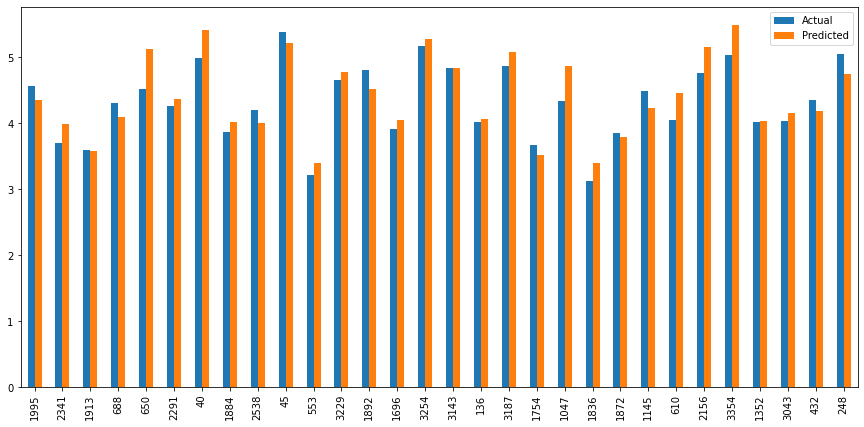

In [152]:
#Trying the Actual vs Predicted valeus or a sample 30 rows
df3 = df_pred_test.sample(30, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

In [153]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod4_train_perf = model_performance_regression(olsmod4, x_train5, y_train)
olsmod4_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230,0.179,0.844,0.841,4.293


In [154]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod4_test_perf = model_performance_regression(olsmod4, x_test5, y_test)
olsmod4_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240,0.186,0.840,0.833,4.509


* The model is able to explain ~84% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 4.5% of the used device prices. 

* Hence, we can conclude the model *olsmod4* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [155]:
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel_train_perf.T, olsmod4_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.228,0.230
MAE,0.178,0.179
R-squared,0.847,0.844
Adj. R-squared,0.844,0.841
MAPE,4.269,4.293


In [156]:
# test performance comparison

models_test_comp_df = pd.concat(
    [olsmodel_test_perf.T, olsmod4_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.237,0.240
MAE,0.184,0.186
R-squared,0.844,0.840
Adj. R-squared,0.837,0.833
MAPE,4.467,4.509


* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

## Final Model Summary

In [157]:
olsmodel_final = sm.OLS(y_train, x_train5).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     292.1
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:02:52   Log-Likelihood:                 118.50
No. Observations:                2417   AIC:                            -147.0
Df Residuals:                    2372   BIC:                             113.6
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -45.14

## Actionable Insights and Recommendations

1. Constant COeffecient: It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient which is -45.1428 in this model.

2.  `main_camera_mp`, `selfie_camera_mp`, `RAM` , `release_year, 'weight_log', 'new_price_log' ; all have positive coefficients. So, as they increase, used price of the device also increases.

3. 1 unit increase in weight of the device (in grams) leads to a increase in used_price of the device by 0.4488.


4. Brand name does show impact on the used_price of the devices; some brands like APple, Nokia, OnePlus, Oppo have a positive coefficeint and some others have a negative coefficient.


5. Devices that support 4G tend to have a higher used_price.
